In [3]:
import pandas as pd
import numpy as np
df= pd.read_csv('ad.data',index_col=False,low_memory=False,header=None)

for i, row in df.iterrows():
    for j in range (0,3):
        try:
            a = float(df.at[i,j])
            df.at[i,j] = a
        except ValueError:
            df.at[i,j] = np.nan
            
#print df.iloc[:][1558]
df.iloc[:][1558] = df.iloc[:][1558].map({'ad.': 1,'nonad.': 0,})
#print df.iloc[:][1558]
print df
print df.dtypes
df = df.apply(pd.to_numeric, errors='coerce')
print df.dtypes
print df
print df.iloc[132,:]

from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=1)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)


     0    1       2    3     4     5     6     7     8     9     ...   1549  \
0     125  125       1    1     0     0     0     0     0     0  ...      0   
1      57  468  8.2105    1     0     0     0     0     0     0  ...      0   
2      33  230  6.9696    1     0     0     0     0     0     0  ...      0   
3      60  468     7.8    1     0     0     0     0     0     0  ...      0   
4      60  468     7.8    1     0     0     0     0     0     0  ...      0   
5      60  468     7.8    1     0     0     0     0     0     0  ...      0   
6      59  460  7.7966    1     0     0     0     0     0     0  ...      0   
7      60  234     3.9    1     0     0     0     0     0     0  ...      0   
8      60  468     7.8    1     0     0     0     0     0     0  ...      0   
9      60  468     7.8    1     0     0     0     0     0     0  ...      0   
10    NaN  NaN     NaN    1     0     0     0     0     0     0  ...      0   
11     90   52  0.5777    1     0     0     0     0 

0       float64
1       float64
2       float64
3       float64
4         int64
5         int64
6         int64
7         int64
8         int64
9         int64
10        int64
11        int64
12        int64
13        int64
14        int64
15        int64
16        int64
17        int64
18        int64
19        int64
20        int64
21        int64
22        int64
23        int64
24        int64
25        int64
26        int64
27        int64
28        int64
29        int64
         ...   
1529      int64
1530      int64
1531      int64
1532      int64
1533      int64
1534      int64
1535      int64
1536      int64
1537      int64
1538      int64
1539      int64
1540      int64
1541      int64
1542      int64
1543      int64
1544      int64
1545      int64
1546      int64
1547      int64
1548      int64
1549      int64
1550      int64
1551      int64
1552      int64
1553      int64
1554      int64
1555      int64
1556      int64
1557      int64
1558      int64
Length: 1559, dtype: obj

In [4]:
print imputed_data.shape
df2 = pd.DataFrame(imputed_data)
print df2
print df2.dtypes

(3279, 1559)
            0           1          2     3     4     5     6     7     8     \
0     125.000000  125.000000   1.000000   1.0   0.0   0.0   0.0   0.0   0.0   
1      57.000000  468.000000   8.210500   1.0   0.0   0.0   0.0   0.0   0.0   
2      33.000000  230.000000   6.969600   1.0   0.0   0.0   0.0   0.0   0.0   
3      60.000000  468.000000   7.800000   1.0   0.0   0.0   0.0   0.0   0.0   
4      60.000000  468.000000   7.800000   1.0   0.0   0.0   0.0   0.0   0.0   
5      60.000000  468.000000   7.800000   1.0   0.0   0.0   0.0   0.0   0.0   
6      59.000000  460.000000   7.796600   1.0   0.0   0.0   0.0   0.0   0.0   
7      60.000000  234.000000   3.900000   1.0   0.0   0.0   0.0   0.0   0.0   
8      60.000000  468.000000   7.800000   1.0   0.0   0.0   0.0   0.0   0.0   
9      60.000000  468.000000   7.800000   1.0   0.0   0.0   0.0   0.0   0.0   
10      0.021208    0.021208   0.021208   1.0   0.0   0.0   0.0   0.0   0.0   
11     90.000000   52.000000   0.577700

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve

X = df2.loc[:, df2.columns != 1558]
y = df2[1558]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=10, weights='uniform')  
classifier.fit(X_train, y_train)
print ("KNN:")
print("Test set accuracy: {:.2f}\n".format(classifier.score(X_test, y_test)))

y_pred_knn = classifier.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

tree = DecisionTreeClassifier(max_depth=10, max_features=10, random_state=0)
tree.fit(X_train, y_train)
print ("Decision Tree:")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(tree.score(X_test, y_test)))

y_pred_dtree = tree.predict_proba(X_test)[:, 1]
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_pred_dtree)

forest = RandomForestClassifier(n_estimators=80, max_features=16, random_state=0)
forest.fit(X_train, y_train)
print ("Random Forest:")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(forest.score(X_test, y_test)))

y_pred_rand = forest.predict_proba(X_test)[:, 1]
fpr_rand, tpr_rand, _ = roc_curve(y_test, y_pred_rand)

NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
print ("Naive Bayes:")
print("Accuracy on training set: {:.3f}".format(NB_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(NB_clf.score(X_test, y_test)))

y_pred_nb = NB_clf.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)

svm = SVC(kernel='rbf', C=1, gamma=1,probability=True)
svm.fit(X_train, y_train)
print ("SVM:")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(svm.score(X_test, y_test)))

y_pred_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)

reg = DecisionTreeRegressor(min_samples_split=3)
reg.fit(X_train, y_train)
print ("Decision Tree Regressor:")
print("Accuracy on training set: {:.3f}".format(reg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(reg.score(X_test, y_test)))

#y_pred_reg = reg.predict_proba(X_test)[:, 1]
#fpr_reg, tpr_reg, _ = roc_curve(y_test, y_pred_reg)


rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

print ("Random Forest Regressor:")
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(rf.score(X_test, y_test)))

#y_pred_rfr = rf.predict_proba(X_test)[:, 1]
#fpr_rfr, tpr_rfr, _ = roc_curve(y_test, y_pred_rfr)

KNN:
Test set accuracy: 0.94

Decision Tree:
Accuracy on training set: 0.918
Accuracy on test set: 0.910

Random Forest:
Accuracy on training set: 1.000
Accuracy on test set: 0.974

Naive Bayes:
Accuracy on training set: 0.805
Accuracy on test set: 0.741

SVM:
Accuracy on training set: 1.000
Accuracy on test set: 0.890

Decision Tree Regressor:
Accuracy on training set: 0.990
Accuracy on test set: 0.752

Random Forest Regressor:
Accuracy on training set: 0.972
Accuracy on test set: 0.801



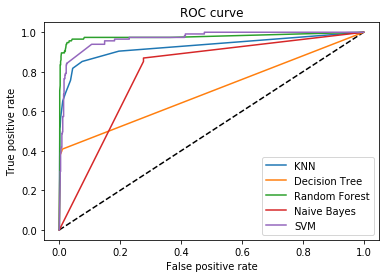

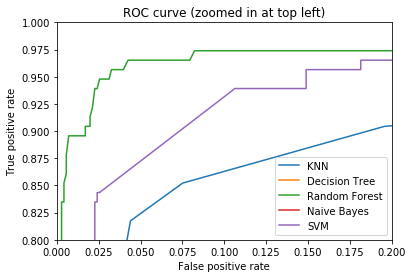

In [36]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree')
plt.plot(fpr_rand, tpr_rand, label='Random Forest')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree')
plt.plot(fpr_rand, tpr_rand, label='Random Forest')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [37]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=1)
select.fit(X, y)
# transform training set
X_train_univariant = select.transform(X)
print X_train_univariant.shape

(3279, 15)


In [38]:
mask = select.get_support()
print mask
count = 0
for i in mask:
    if i == True:
        print count
    count = count+1

[False  True False ..., False False False]
1
351
968
1047
1143
1153
1154
1198
1218
1243
1344
1399
1435
1455
1483


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_univariant, y, stratify=y, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=10, weights='uniform')  
classifier.fit(X_train, y_train)
print ("KNN:")
print("Test set accuracy: {:.2f}\n".format(classifier.score(X_test, y_test)))

y_pred_knn = classifier.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

tree = DecisionTreeClassifier(max_depth=10, max_features=10, random_state=0)
tree.fit(X_train, y_train)
print ("Decision Tree:")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(tree.score(X_test, y_test)))

y_pred_dtree = tree.predict_proba(X_test)[:, 1]
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_pred_dtree)

forest = RandomForestClassifier(n_estimators=80, random_state=0)
forest.fit(X_train, y_train)
print ("Random Forest:")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(forest.score(X_test, y_test)))

y_pred_rand = forest.predict_proba(X_test)[:, 1]
fpr_rand, tpr_rand, _ = roc_curve(y_test, y_pred_rand)

NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
print ("Naive Bayes:")
print("Accuracy on training set: {:.3f}".format(NB_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(NB_clf.score(X_test, y_test)))

y_pred_nb = NB_clf.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)

svm = SVC(kernel='rbf', C=1, gamma=1,probability=True)
svm.fit(X_train, y_train)
print ("SVM:")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(svm.score(X_test, y_test)))

y_pred_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)

reg = DecisionTreeRegressor(min_samples_split=3)
reg.fit(X_train, y_train)
print ("Decision Tree Regressor:")
print("Accuracy on training set: {:.3f}".format(reg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(reg.score(X_test, y_test)))

#y_pred_reg = reg.predict_proba(X_test)[:, 1]
#fpr_reg, tpr_reg, _ = roc_curve(y_test, y_pred_reg)


rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

print ("Random Forest Regressor:")
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(rf.score(X_test, y_test)))

#y_pred_rfr = rf.predict_proba(X_test)[:, 1]
#fpr_rfr, tpr_rfr, _ = roc_curve(y_test, y_pred_rfr)

KNN:
Test set accuracy: 0.94

Decision Tree:
Accuracy on training set: 0.974
Accuracy on test set: 0.959

Random Forest:
Accuracy on training set: 0.976
Accuracy on test set: 0.959

Naive Bayes:
Accuracy on training set: 0.942
Accuracy on test set: 0.941

SVM:
Accuracy on training set: 0.975
Accuracy on test set: 0.948

Decision Tree Regressor:
Accuracy on training set: 0.837
Accuracy on test set: 0.663

Random Forest Regressor:
Accuracy on training set: 0.828
Accuracy on test set: 0.711



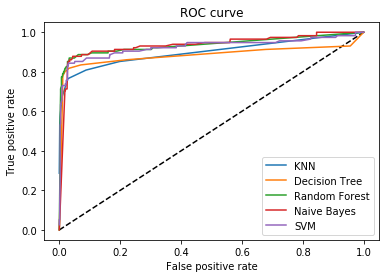

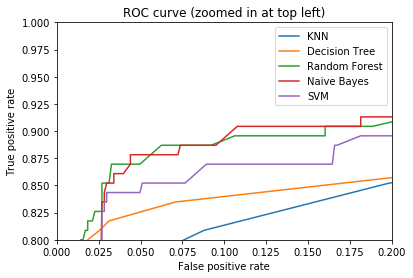

In [41]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree')
plt.plot(fpr_rand, tpr_rand, label='Random Forest')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree')
plt.plot(fpr_rand, tpr_rand, label='Random Forest')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=10, random_state=42,max_features=15),
    threshold="median")

select.fit(X, y)
X_train_model_based = select.transform(X)
print X_train_model_based.shape

(3279, 779)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_model_based, y, stratify=y, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=10, weights='uniform')  
classifier.fit(X_train, y_train)
print ("KNN:")
print("Test set accuracy: {:.2f}\n".format(classifier.score(X_test, y_test)))

y_pred_knn = classifier.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

tree = DecisionTreeClassifier(max_depth=10, max_features=10, random_state=0)
tree.fit(X_train, y_train)
print ("Decision Tree:")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(tree.score(X_test, y_test)))

y_pred_dtree = tree.predict_proba(X_test)[:, 1]
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_pred_dtree)

forest = RandomForestClassifier(n_estimators=80, random_state=0)
forest.fit(X_train, y_train)
print ("Random Forest:")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(forest.score(X_test, y_test)))

y_pred_rand = forest.predict_proba(X_test)[:, 1]
fpr_rand, tpr_rand, _ = roc_curve(y_test, y_pred_rand)

NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
print ("Naive Bayes:")
print("Accuracy on training set: {:.3f}".format(NB_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(NB_clf.score(X_test, y_test)))

y_pred_nb = NB_clf.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)

svm = SVC(kernel='rbf', C=1, gamma=1,probability=True)
svm.fit(X_train, y_train)
print ("SVM:")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(svm.score(X_test, y_test)))

y_pred_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)

reg = DecisionTreeRegressor(min_samples_split=3)
reg.fit(X_train, y_train)
print ("Decision Tree Regressor:")
print("Accuracy on training set: {:.3f}".format(reg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(reg.score(X_test, y_test)))

#y_pred_reg = reg.predict_proba(X_test)[:, 1]
#fpr_reg, tpr_reg, _ = roc_curve(y_test, y_pred_reg)


rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

print ("Random Forest Regressor:")
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(rf.score(X_test, y_test)))

#y_pred_rfr = rf.predict_proba(X_test)[:, 1]
#fpr_rfr, tpr_rfr, _ = roc_curve(y_test, y_pred_rfr)

KNN:
Test set accuracy: 0.94

Decision Tree:
Accuracy on training set: 0.955
Accuracy on test set: 0.952

Random Forest:
Accuracy on training set: 1.000
Accuracy on test set: 0.980

Naive Bayes:
Accuracy on training set: 0.774
Accuracy on test set: 0.721

SVM:
Accuracy on training set: 0.999
Accuracy on test set: 0.894

Decision Tree Regressor:
Accuracy on training set: 0.990
Accuracy on test set: 0.707

Random Forest Regressor:
Accuracy on training set: 0.971
Accuracy on test set: 0.813



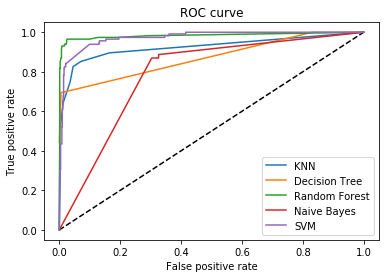

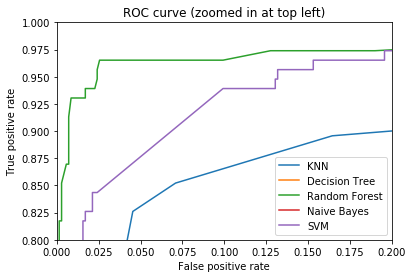

In [44]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree')
plt.plot(fpr_rand, tpr_rand, label='Random Forest')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree')
plt.plot(fpr_rand, tpr_rand, label='Random Forest')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [45]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=10, random_state=42,max_features=15),
             n_features_to_select=15,step=50)

select.fit(X, y)
X_train_iterative = select.transform(X)
print X_train_iterative.shape

(3279, 15)


In [46]:
mask = select.get_support()
print mask
count = 0
for i in mask:
    if i == True:
        print count
    count = count+1

[ True  True  True ..., False False False]
0
1
2
3
187
351
398
968
1022
1229
1243
1344
1399
1455
1483


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_iterative, y, stratify=y, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=10, weights='uniform')  
classifier.fit(X_train, y_train)
print ("KNN:")
print("Test set accuracy: {:.2f}\n".format(classifier.score(X_test, y_test)))

y_pred_knn = classifier.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

tree = DecisionTreeClassifier(max_depth=10, max_features=10, random_state=0)
tree.fit(X_train, y_train)
print ("Decision Tree:")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(tree.score(X_test, y_test)))

y_pred_dtree = tree.predict_proba(X_test)[:, 1]
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_pred_dtree)

forest = RandomForestClassifier(n_estimators=80, random_state=0)
forest.fit(X_train, y_train)
print ("Random Forest:")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(forest.score(X_test, y_test)))

y_pred_rand = forest.predict_proba(X_test)[:, 1]
fpr_rand, tpr_rand, _ = roc_curve(y_test, y_pred_rand)

NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
print ("Naive Bayes:")
print("Accuracy on training set: {:.3f}".format(NB_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(NB_clf.score(X_test, y_test)))

y_pred_nb = NB_clf.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)

svm = SVC(kernel='rbf', C=1, gamma=1,probability=True)
svm.fit(X_train, y_train)
print ("SVM:")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(svm.score(X_test, y_test)))

y_pred_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)

reg = DecisionTreeRegressor(min_samples_split=3)
reg.fit(X_train, y_train)
print ("Decision Tree Regressor:")
print("Accuracy on training set: {:.3f}".format(reg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(reg.score(X_test, y_test)))

#y_pred_reg = reg.predict_proba(X_test)[:, 1]
#fpr_reg, tpr_reg, _ = roc_curve(y_test, y_pred_reg)


rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

print ("Random Forest Regressor:")
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(rf.score(X_test, y_test)))

#y_pred_rfr = rf.predict_proba(X_test)[:, 1]
#fpr_rfr, tpr_rfr, _ = roc_curve(y_test, y_pred_rfr)

KNN:
Test set accuracy: 0.94

Decision Tree:
Accuracy on training set: 0.983
Accuracy on test set: 0.967

Random Forest:
Accuracy on training set: 0.993
Accuracy on test set: 0.972

Naive Bayes:
Accuracy on training set: 0.958
Accuracy on test set: 0.957

SVM:
Accuracy on training set: 0.992
Accuracy on test set: 0.952

Decision Tree Regressor:
Accuracy on training set: 0.948
Accuracy on test set: 0.734

Random Forest Regressor:
Accuracy on training set: 0.940
Accuracy on test set: 0.808



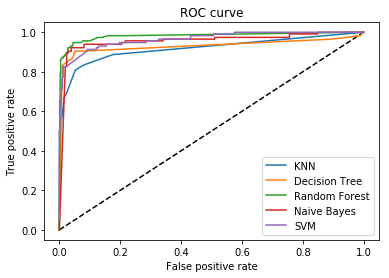

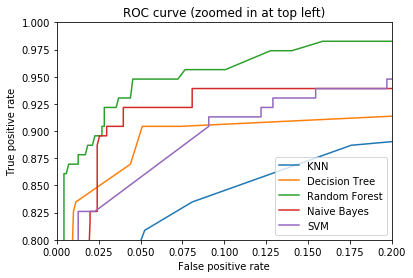

In [48]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree')
plt.plot(fpr_rand, tpr_rand, label='Random Forest')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_dtree, tpr_dtree, label='Decision Tree')
plt.plot(fpr_rand, tpr_rand, label='Random Forest')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [90]:
mask = select.get_support()
print mask
count = 0
for i in mask:
    if i == True:
        print count
    count = count+1

[ True  True  True ..., False False False]
0
1
2
3
187
351
398
968
1022
1060
1229
1243
1344
1399
1455
1483
